kernel approximationはSGDでうまくいかない場合に利用する。

XORのデータが良い例。

# まずはSGDで実施

In [1]:
# ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import linear_model, metrics, preprocessing, cross_validation #機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# XORのデータを作成する(x=正、y=正)=0,(x=正、y=負)=1, 的な--------------
np.random.seed(0)
X_xor = np.random.randn(200,2) 
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor = np.where(y_xor,1,0)
pd.DataFrame(y_xor)  #この行を実行するとデータが見れる

,0
0,0
1,0
2,1
3,1
4,1
5,0
6,0
7,0
8,1
9,1


<function matplotlib.pyplot.show>

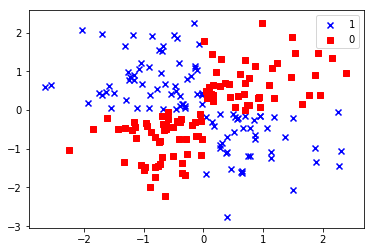

In [3]:
# プロットしてみる------------------------------------------------------
%matplotlib inline
 
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c='r', marker='s', label='0')
plt.legend(loc='best')
plt.show

In [4]:
# データの整形-------------------------------------------------------
X_std = X_xor
z = y_xor

In [5]:
# 機械学習で分類する---------------------------------------------------
clf_result = linear_model.SGDClassifier(loss="hinge", max_iter=1000) #loss="hinge", loss="log"
clf_result.fit(X_std, z)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [6]:
# K分割交差検証（cross validation）で性能を評価する---------------------
scores = cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.596015037593985
正解率の標準偏差 =  0.11190450650673761


正答率 =  0.4


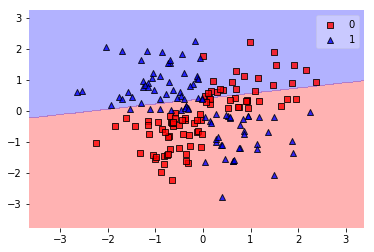

In [7]:
# トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label=cross_validation.train_test_split(X_std,z, test_size=0.1, random_state=0)
clf_result.fit(X_train, train_label)

#正答率を求める
pre = clf_result.predict(X_test)
ac_score = metrics.accuracy_score(test_label,pre)
print("正答率 = ",ac_score)

#plotする
X_train_plot = np.vstack(X_train)
train_label_plot = np.hstack(train_label)
X_test_plot = np.vstack(X_test)
test_label_plot = np.hstack(test_label)
plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01) #学習データをプロット

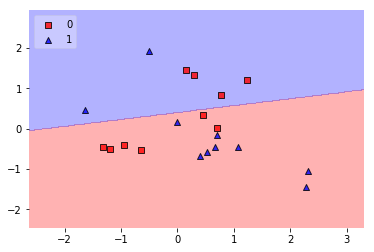

In [8]:
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット

# カーネル近似で実行

In [9]:
# ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import linear_model, metrics, preprocessing, cross_validation #機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用
from sklearn.kernel_approximation import RBFSampler #カーネル近似用の関数
from matplotlib.colors import ListedColormap #plot用

In [10]:
# XORのデータを作成する(x=正、y=正)=0,(x=正、y=負)=1, 的な--------------
np.random.seed(0)
X_xor = np.random.randn(200,2) 
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor = np.where(y_xor,1,0)

<function matplotlib.pyplot.show>

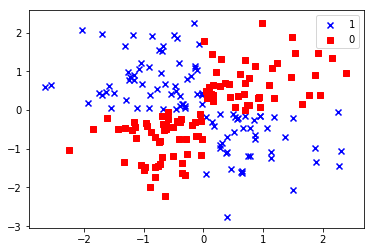

In [11]:
# プロットしてみる------------------------------------------------------
%matplotlib inline
 
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c='r', marker='s', label='0')
plt.legend(loc='best')
plt.show

In [12]:
# データの整形-------------------------------------------------------
X_std = X_xor
z = y_xor

# 正規化
sc = preprocessing.StandardScaler()
sc.fit(X_std)
X_std = sc.transform(X_std)

以下でカーネル近似を実施している。  
カーネル近似には「RBFSampler」と呼ばれるRadial Basis Function Kernelを近似する手法を使用。  
RBFはいわゆるガウスカーネルのこと。

引数ガンマは分散の逆数に対応し、カーネルの形（急峻具合）を決める。  
n_components=100は、作成する非線形項の数を決めており、元は2次元だったデータが100次元に拡張される。

random_state=1は、乱数のseedを1に固定して、結果が再現されるようにしている。

In [13]:
# カーネル近似を適用する------------------------------------------
rbf_feature = RBFSampler(gamma=1, n_components=100, random_state=1)
 
X_std = rbf_feature.fit_transform(X_std)
print("X_stdの大きさ ",pd.DataFrame(X_std).shape)
#pd.DataFrame(X_std).to_clipboard() #これでクリップボードに保持できるのでエクセルに貼れる

X_stdの大きさ  (200, 100)


In [14]:
# 機械学習で分類する---------------------------------------------------
clf_result=linear_model.SGDClassifier(loss="log", max_iter=1000) #loss="hinge", loss="log"

In [15]:
# K分割交差検証（cross validation）で性能を評価する---------------------
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.9697368421052632
正解率の標準偏差 =  0.04013912784911419


In [16]:
# トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label=cross_validation.train_test_split(X_std,z, test_size=0.1, random_state=1)
clf_result.fit(X_train, train_label)

#正答率を求める
pre=clf_result.predict(X_test)
ac_score = metrics.accuracy_score(test_label,pre)
print("正答率 = ",ac_score)

正答率 =  0.95


<function matplotlib.pyplot.show>

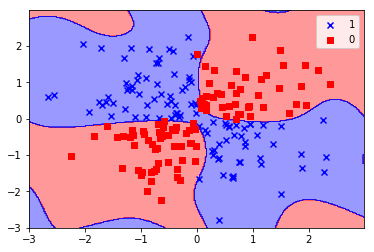

In [17]:
# Plotする
x1_min, x1_max, x2_min, x2_max=-3, 3, -3, 3
resolution = 0.02
xx1, xx2=np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
X = (np.array([xx1.ravel(), xx2.ravel()]).T)
plot_z = clf_result.predict(rbf_feature.fit_transform(X))
colors = ('red','blue')
cmap = ListedColormap(colors[:len(np.unique(plot_z))])
plot_z = plot_z.reshape(xx1.shape)
plt.contourf(xx1,xx2, plot_z, alpha=0.4, cmap=cmap)

plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c='r', marker='s', label='0')
plt.legend(loc='best')
plt.show

### kernel approximationとは
 - [kernal approximation:sklearn](http://scikit-learn.org/stable/modules/kernel_approximation.html)

#### SGDとの関係
SGDは分類するための識別式を線形として仮定していた。  
XORの問題のように線形では分離できない問題が存在する。

kernel approximationは識別式を非線形化して表現する方法であり、より複雑な分類問題にも対応可能となる。

##### カーネルトリック
「カーネル近似」を知るには、「カーネルトリック」について知る必要がある。

データ $n_1$ が $M$ 次元で表わされ、$n_1 = (n_{11}, n_{12},…, n_{1M})$ だった場合、  
非線形の式とは $n_{11}^2$ とか、$n_{11}*n_{12}$ などの項を含み、1次の項だけでない式である。

そこで $x_1, x_2, x_1^2, x_2^2, x_1*x_2, …$ の線形和にすれば、識別面を作成できるはずである。
（サンプル数より少ない項数でないと解が計算できないことに注意する）

$(x_1, x_2, …, x_M)$ から非線形項 $(x_1^2, x_2^2, … )$ を作る変換（写像）を $\phi$ で表すと、$\phi(x)=(x_1^2, x_2^2, …)$ となる。

この $\phi(x)$ によりできた非線形項を使って識別平面を作成し、識別平面の係数を学習させればよいが、  
その過程で2つの問題点が出てくる。

1つ目の問題はデータ $n_1$ と $n_2$ の写像されたもの同士の内積 $\phi(n_1)\phi(n_2)$ を計算が複雑になることである。

ただ、$\phi(n_1)\phi(n_2)$ が容易に計算できる場合があり、その容易に計算できる $\phi$ がカーネル関数と呼ばれるものである。  
$\phi(n_1)\phi(n_2)$ を愚直に計算せず、カーネル関数のもとで $\phi(n_1)\phi(n_2)$ を $n_1$ と $n_2$ の内積を使って容易に求める方法を「カーネルトリック」という。

2つ目の問題点は $\phi(n_1)*\phi(n_2)$ みたいなのが要素となる行列が必要で、その次元はデータ数$N$に応じた次元になるという点で、$N×N$の行列を作る必要がある。  
これはデータ数$N$が多いときにはかなり困難となる。

ここで、カーネルトリックではなく、カーネル近似で $\phi(n_1) = (n_{11}^2, n_{12}^2, …)$ を求める。  
RBFSamplerの場合、乱数（モンテカルロ法）に従って近似している。

#### カーネル近似の使い方
カーネル近似を使用するには、
 - 非線形項を何次元分作るのか
 - どんな形のどのカーネルを使うのか

を決める必要がある。

こうしたハイパーパラメータを設定するひとつの方法として、バリデーションデータを用意する方法がある。  
手持ちのデータを学習データ、テストデータ、バリデーションデータに分け、カーネルの設定やSGDのパラメータを決めるのに、学習データで識別器を作成して、バリデーションデータで性能を評価する。

その結果性能が良かったハイパーパラメータの設定を採用し、その設定でテストデータに対して識別を行って、最終的な性能を決める。  
また、rbfカーネルの場合、gammaには1/次元数が用いられることが多い。